# Sport Vouchers Program Analysis

The goal of this Portfolio task is to explore data from the Federal Government Sport Vouchers program - this is a
program that provides up to two $100 vouchers for kids to participate in organised sport. Here's the [NSW Active Kids page](https://www.service.nsw.gov.au/transaction/apply-active-kids-voucher), there are similar schemes in other states - this data is from South Australia.

This is an exercise in exploring data and communicating the insights you can gain from it.  The source data comes
from the `data.gov.au` website and provides details of all Sport Vouchers that have been redeemed since February  in SA 2015 as part of the Sport Voucher program:  [Sports Vouchers Data](https://data.gov.au/dataset/ds-sa-14daba50-04ff-46c6-8468-9fa593b9f100/details).  This download is provided for you as `sportsvouchersclaimed.csv`.

To augment this data you can also make use of [ABS SEIFA data by LGA](http://stat.data.abs.gov.au/Index.aspx?DataSetCode=ABS_SEIFA_LGA#) which shows a few measures of Socioeconomic Advantage and Disadvantage for every Local Government Area. This data is provided for you as `ABS_SEIFA_LGA.csv`. This could enable you to answer questions about whether the voucher program is used equally by parents in low, middle and high socioeconomic areas.   You might be interested in this if you were concerned that this kind of program might just benifit parents who are already advantaged (they might already be paying for sport so this program wouldn't be helping much).

Questions:
* Describe the distribution of vouchers by: LGA, Sport - which regions/sports stand out? 
* Are some sports more popular in different parts of the state?
* Are any LGAs over/under represented in their use of vouchers?
* Is there a relationship between any of the SEIFA measures and voucher use in an LGA?

A challenge in this task is to display a useful summary of the data given that there are a large number of LGAs and sports involved.  Try to avoid long lists and large tables. Think about what plots and tables communicate the main points of your findings. 


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
# read the sports vouchers data
sa_vouchers = pd.read_csv("files/sportsvouchersclaimed.csv")
sa_vouchers.head()

,Participant_ID,Participant_Suburb,Club_Previous_Member,Participant_ATSI_Indicator,Participant_CALD_Indicator,Participant_Sex,Voucher_Value,Club_Name,Voucher_Sport,Participant_LGA,Participant_Electorate,Voucher_Completion_Date,Voucher_Claim_Year
0,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,26/6/15 1:19,2015
1,1000002,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Male,50,Flagstaff Hill Football Club,Australian Rules,ONKAPARINGA,FISHER,29/6/16 23:55,2016
2,1000004,ABERFOYLE PARK,Not Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,21/4/16 3:37,2016
3,1000004,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Hub Gymnastics Club,Gymnastics,ONKAPARINGA,FISHER,30/3/17 0:47,2017
4,1000005,ABERFOYLE PARK,Registered Previously,Not ATSI,Not CALD,Female,50,Blackwood Community Recreation Association,Gymnastics,ONKAPARINGA,FISHER,20/7/15 2:50,2015


In the SEIFA data, each Local Government Area (LGA) has its own row, however the names of the LGAs are preceded by a letter or letters in brackets. In order to correlate this with the voucher data, I will remove this and convert it to uppercase.

Each LGA's data contains a wide range of factors, some of which may be important to my study.

In [9]:
sa_vouchers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127526 entries, 0 to 127525
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Participant_ID              127526 non-null  int64 
 1   Participant_Suburb          127526 non-null  object
 2   Club_Previous_Member        127526 non-null  object
 3   Participant_ATSI_Indicator  127526 non-null  object
 4   Participant_CALD_Indicator  127526 non-null  object
 5   Participant_Sex             127526 non-null  object
 6   Voucher_Value               127526 non-null  int64 
 7   Club_Name                   127526 non-null  object
 8   Voucher_Sport               127526 non-null  object
 9   Participant_LGA             127526 non-null  object
 10  Participant_Electorate      127526 non-null  object
 11  Voucher_Completion_Date     125446 non-null  object
 12  Voucher_Claim_Year          127526 non-null  int64 
dtypes: int64(3), object(10)
memor

**DESCRIBE THE DISTRIBUTION OF VOUCHERS BY: LGA, SPORT - WHICH REGIONS/SPORTS STAND OUT?**

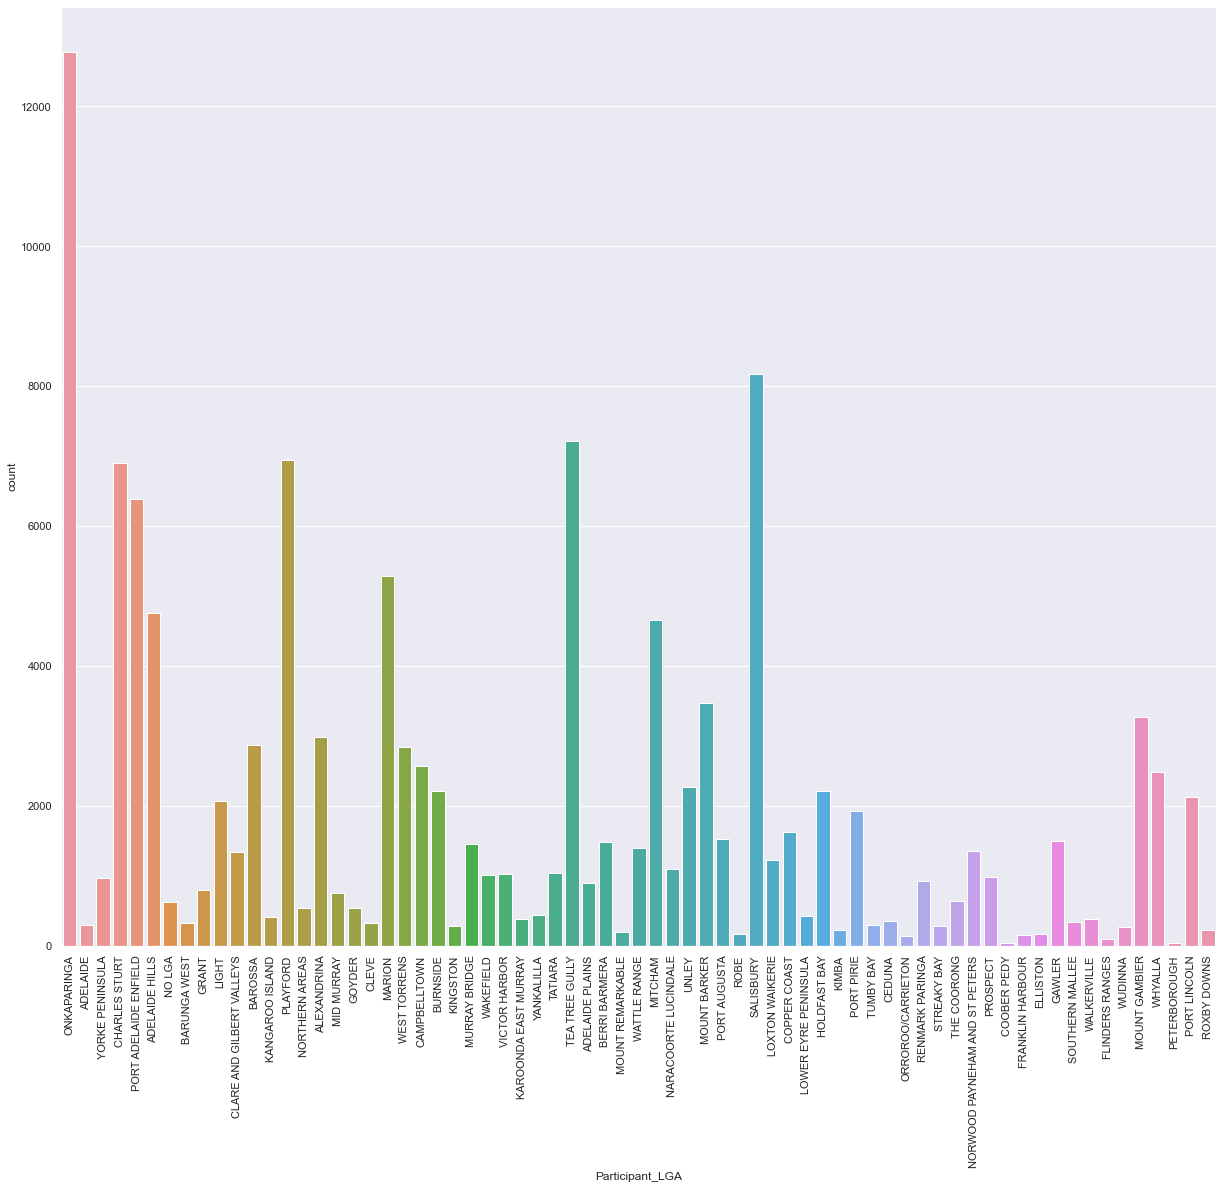

In [92]:
plt.figure(figsize=(20.7,17.27))
chart = sns.countplot(x='Participant_LGA', data = sa_vouchers)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

In [16]:
# The number of vouchers distributed to various LGAs is shown below.
total =sa_vouchers.groupby('Participant_LGA')['Participant_LGA'].count().sort_values(ascending=False)
print(total)

Participant_LGA
ONKAPARINGA          12782
SALISBURY             8169
TEA TREE GULLY        7219
PLAYFORD              6940
CHARLES STURT         6897
                     ...  
FRANKLIN HARBOUR       155
ORROROO/CARRIETON      137
FLINDERS RANGES        102
PETERBOROUGH            45
COOBER PEDY             39
Name: Participant_LGA, Length: 69, dtype: int64


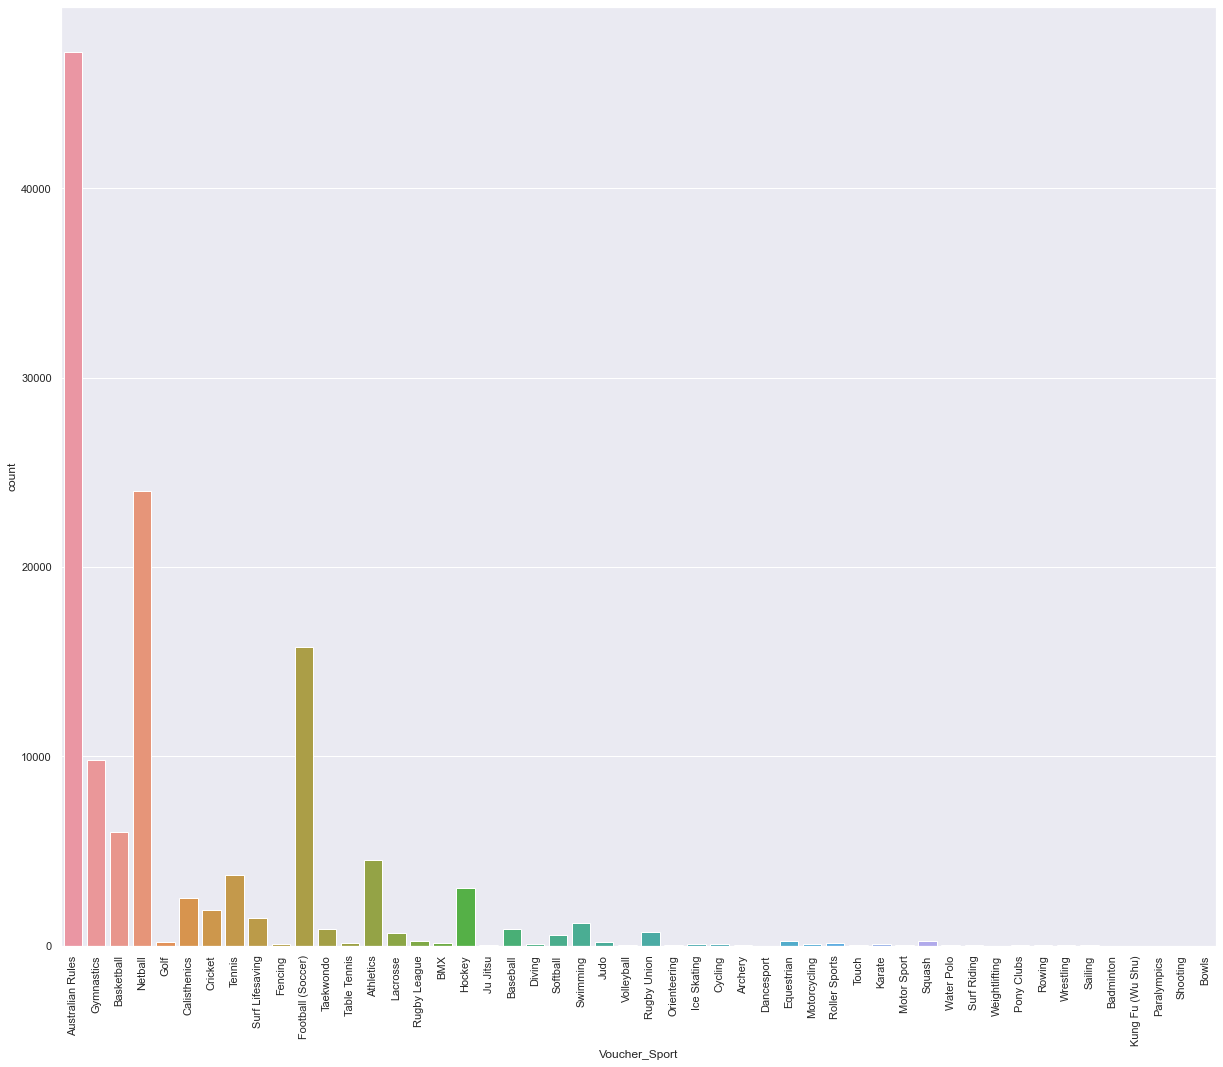

In [93]:
plt.figure(figsize=(20.7,17.27))
chart = sns.countplot(x='Voucher_Sport', data = sa_vouchers)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

In [94]:
# The number of vouchers given out in each Sports category is listed below.
df=sa_vouchers.groupby('Voucher_Sport')['Voucher_Sport'].count().sort_values(ascending=False)
df

Voucher_Sport
Australian Rules     47224
Netball              24017
Football (Soccer)    15775
Gymnastics            9823
Basketball            6016
Athletics             4518
Tennis                3742
Hockey                3026
Calisthenics          2522
Cricket               1875
Surf Lifesaving       1442
Swimming              1204
Taekwondo              910
Baseball               865
Rugby Union            734
Lacrosse               656
Softball               548
Rugby League           270
Equestrian             265
Squash                 249
Judo                   210
Golf                   188
Table Tennis           166
BMX                    157
Roller Sports          148
Cycling                105
Motorcycling            97
Karate                  91
Diving                  89
Ice Skating             86
Fencing                 84
Volleyball              62
Orienteering            56
Water Polo              48
Motor Sport             45
Sailing                 40
Archery       

## Challenge - Queensland

_Note: this is an extra task that you might take on to get a better grade for your portfolio.  You can get a good pass grade without doing this._ 

Queensland has a similar program called [Get Started](https://data.gov.au/dataset/ds-qld-3118838a-d425-48fa-bfc9-bc615ddae44e/details?q=get%20started%20vouchers) and we can retrieve data from their program in a similar format.  

The file [round1-redeemed_get_started_vouchers.csv](files/round1-redeemed_get_started_vouchers.csv) contains records of the vouchers issued in Queensland. The date of this data is not included but the program started in 2015 so it is probably from around then.  

The data includes the LGA of the individual but the name of the activity is slightly different.  To do a comparable analysis you would need to map the activity names onto those from South Australia. 

In [1]:
qld_vouchers = pd.read_csv("files/round1_redeemed_get_started_vouchers.csv")
qld_vouchers.head()

NameError: name 'pd' is not defined